##Probability distribution application for herp owners##

So my leopard gecko apparently got sick last month and I was suspecting of a respiratory issue because I noticed an increased breath rate. The exotic veterinary told me to keep monitoring breath rates to discard or medicate a respiratory infection before it was too late.

As a matter of "benchmarking", my vet estimated between 9 and 11 breaths per minute are considered "normal" based on his experience. He told me anything greater than that should be a concern. However, I noticed my leopard gecko's BR (breath rate for short) was oscilating in and out the interval my vet gave me. 

So I wondered, how likely were these values based on a probability distribution. Also, what was a normal time interval between breaths. So I wanted to know:

1. What would a normal BR look like? Is my leopard gecko doing ok even though I got values out of the vet's interval? Does she need a medical intervention ASAP? 

Well, even if my gecko was sick or not I did book an appointment. It's never a bad idea to have your pets checked once a while. But in the meantime, I wanted to analyze the data in a more scientific way. I couldn't wait until my vet checked up on her so I decided to get some data and analyze it (that's what my profession is about after all). My first guess was to approach this problem with a Poisson distribution. We'd need a theoretical Lambda and then visualize the distribution. For this case, I'll simply take the middle of my vet's interval. 

 λ = 10 breaths per minute of a healthy gecko.

 Also let X be the number of breaths in a minute period.

In [1]:
from scipy.stats import poisson, kurtosis, skew
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Leopard Gecko Breath rate distribution')

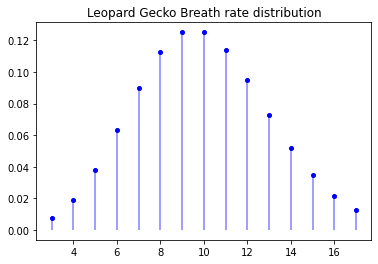

In [2]:
fig, ax = plt.subplots(1,1)
mu = np.mean([7,13])
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x,mu), 'bo', ms = 4)
ax.vlines(x, 0, poisson.pmf(x,mu), colors = 'b', alpha = 0.5)
plt.title('Leopard Gecko Breath rate distribution')

Now that we've modeled a leopard gecko breath rate distribution, let's use it to fit my leopard gecko's BR data. First, some EDA. Here´s my leopard gecko BR rate during a month. 

In [46]:
Br = [10,9,12,6,11,9,9,9,10,14,11,12,12,10,14,12,
      13,9,10,12,12,14,12,9,12,11,10,11,9,12,7]
data = pd.DataFrame({
    'day': list(range(1,32)),
    'BR': Br
    })
data.set_index('day',inplace=True)
data

,BR
day,
1,10
2,9
3,12
4,6
5,11
6,9
7,9
8,9
9,10


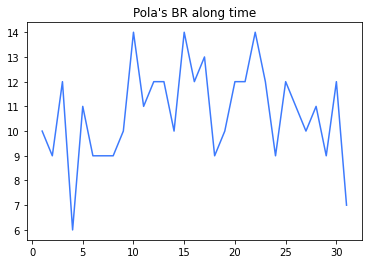

In [47]:
plt.plot(data.index, data.BR, c = 'xkcd:lightish blue')
ax.set_xticks(ax.get_xticks()[::3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Pola's BR along time")
plt.show()

Text(0.5, 1.0, 'BR distribution')

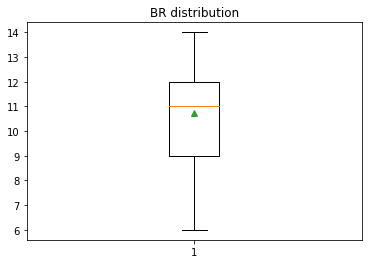

In [48]:
plt.boxplot(data.BR,showmeans= True)
plt.title('BR distribution')

Text(0.5, 1.0, 'BR distribution')

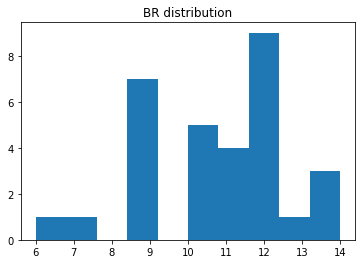

In [49]:
plt.hist(data.BR)
plt.title('BR distribution')

In [50]:
data.describe()

,BR
count,31.000000
mean,10.741935
std,1.931627
min,6.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,14.000000


In [51]:
print('Kurtosis ------> {}'.format(kurtosis(data.BR)))
print('Skewness ------> {}'.format(skew(data.BR)))

Kurtosis ------> -0.14424420101487279
Skewness ------> -0.3046873276464194


So 50% of the times my leopard gecko was between the vet's intervals. Ok cool, but what about the other half of the data. Does it mean my lizard is sick? Is there enough evidence to support such affirmation?

I think it's time to bring hypothesis testing into action.
Remember for this experiment, 
  
    λ = 10 breaths per minute of a healthy gecko
    And let X be the number of breaths in a minute period.
    Therefore,
    X ~ Poisson(λ)
Now will formulate the null and the alternative hypothesis for this experiment. We want to prove:

    Ho : λ = 10
    Ha : λ > 10

And so if our data doesn't happen to be within λ, it would be safe to say my leopard gecko is having a higher BR than normal and needs a medical intervention ASAP. To do that, we will get:

    P[X=> mean]
    P[X=> median]
    P[X=> max]
    
    alpha = 0.05


In [66]:
df = data.copy()
def poisson_test(stat, mu, alpha = 0.05):
  p_value = 1 - poisson.cdf(stat, mu)
  if p_value < alpha: return True, p_value
  else: return False, p_value

stats = [np.mean(df.BR),np.median(df.BR), max(df.BR)]
tests = [poisson_test(int(stat), mu) for stat in stats]
stats, tests

([10.741935483870968, 11.0, 14],
 [(False, 0.41696024980701485),
  (False, 0.30322385369689386),
  (False, 0.0834584729346628)])

In [64]:
if any(list(zip(*tests))[0]):
  print('Reject null hypothesis')
else:
  print("Accept null hypothesis")

Accept null hypothesis


Finally, we were able to test the mean, the median and the maximum value in our data. Neither of these provided a p value less than 0.05. So we accept the null hypothesis meaning there is no evidence to support the idea my gecko's BR is unusual.

Now I will sit tight and wait until the appointment comes. I'll show him this analysis and I might as well land a job there... Just kidding I have no intentions of leaving marketing and logistics as a my expertise domain! One thing is for sure, statistics is the mother of all sciences tho!